In [342]:
import matplotlib.pyplot as plt
import os
import re
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
import subprocess
import re
import json

In [343]:
print(tf.__version__)

2.13.0


In [344]:
# Set the seed value for experiment reproducibility.
SEED = 42
EPOCHS = 2000
BATCH_SIZE = 15
VALIDATION_SPLIT = 0.2
tf.random.set_seed(SEED)
# np.random.seed(SEED)

In [345]:
dataset = tf.keras.utils.text_dataset_from_directory(
    'file:///home/alireza/Documents/Projects/context_classifier/ai/dataset',
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    seed=SEED,
    subset='both')

print(dataset[0].class_names)
print(dataset)

Found 12737 files belonging to 6 classes.
Using 10190 files for training.
Using 2547 files for validation.
['negative', 'neutral', 'null', 'other', 'positive', 'toxic']
[<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>, <_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>]


In [346]:
# sentiment_dataset = tf.keras.utils.text_dataset_from_directory(
#     'file:///home/alireza/Documents/Projects/context_classifier/ai/dataset/sentiment',
#     batch_size=BATCH_SIZE,
#     validation_split=VALIDATION_SPLIT,
#     seed=SEED,
#     subset='both')

# print(sentiment_dataset[0].class_names)

In [347]:
# type_dataset = tf.keras.utils.text_dataset_from_directory(
#     'file:///home/alireza/Documents/Projects/context_classifier/ai/dataset/type',
#     batch_size=BATCH_SIZE,
#     validation_split=VALIDATION_SPLIT,
#     seed=SEED,
#     subset='both')

# print(type_dataset[0].class_names)

In [348]:
# topic_dataset = tf.keras.utils.text_dataset_from_directory(
#     'file:///home/alireza/Documents/Projects/context_classifier/ai/dataset/topic',
#     batch_size=BATCH_SIZE,
#     validation_split=VALIDATION_SPLIT,
#     seed=SEED,
#     subset='both')

# print(topic_dataset[0].class_names)

In [349]:
# print(sentiment_dataset[0].class_names)
# print(type_dataset[0].class_names)
# print(topic_dataset[0].class_names)

In [350]:
for text_batch, label_batch in dataset[0]:
    print(text_batch.shape[0])
    # for i in range(text_batch.shape[0]):
    #     print("Review", text_batch.numpy()[i].decode('utf-8'))
    #     print("Label", label_batch.numpy()[i])


15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
1

In [351]:
def custom_standardization(input_data):
  input_data = tf.strings.regex_replace(tf.strings.regex_replace(tf.strings.regex_replace(input_data, '<br>', ' '), '<br/>', ' '), '<br />', ' ')
  input_data = tf.strings.lower(input_data)

  return input_data

max_features = 20000
sequence_length = 1000

unique_tokens = set()

datasets = [
   dataset[0],
   dataset[1],
  # sentiment_dataset[0],
  # sentiment_dataset[1],
  # type_dataset[0],
  # type_dataset[1],
  # topic_dataset[0],
  # topic_dataset[1]
]
# def custom_split(input_data):
#    return input_data.split("\U")

for curent_dataset in datasets:
    vectorize_layer = tf.keras.layers.TextVectorization(
      standardize=custom_standardization,
      max_tokens=max_features,
      output_mode='int',
      output_sequence_length=sequence_length)

    # Use adapt to update the unique_tokens set
    vectorize_layer.adapt(curent_dataset.map(lambda x, y: x))
    # print(list(vectorize_layer.get_vocabulary()))
    unique_tokens.update(vectorize_layer.get_vocabulary())

# Create a new TextVectorization layer with the merged vocabulary
merged_vectorize_layer = tf.keras.layers.TextVectorization(
  standardize=custom_standardization,
  max_tokens=max_features,
  output_mode='int',
  output_sequence_length=sequence_length)
# Adapt the new layer with the merged vocabulary
merged_vectorize_layer.adapt(list(unique_tokens))

print(len(merged_vectorize_layer.get_vocabulary()))
print(merged_vectorize_layer.get_vocabulary())

20000
['', '[UNK]', '\U0001faf6\U0001faf6', '\U0001faf6\U0001fae0', '\U0001faf6🙏🙏\U0001faf6\U0001faf6\U0001faf6', '\U0001faf6🏻\U0001faf6🏻\U0001faf6🏻\U0001faf6🏻\U0001faf6🏻\U0001faf6🏻\U0001faf6🏻\U0001faf6🏻', '\U0001faf6', '\U0001faf5🏻', '\U0001faf3🇩🇪', '\U0001fae8😲', '\U0001fae4', '\U0001fae3\U0001fae3😬😬😖😖', '\U0001fae1', '\U0001fae0\U0001fae0🤍', '\U0001fae0\U0001fae0❤يكي', '\U0001fae0🧋', '\U0001fae0🥺\U0001f979', '\U0001fae0🥲', '\U0001fae0😂', '\U0001fae0❤️', '\U0001fae0✨💋🤍', '\U0001fae0', '🫂🫂🫂😍❤️❤️', '🫂🫂🫂', '🫂🥺', '🫂🤍😍', '🫂❤️', '🫂', '🫀🫂🤝🏻', '🫀😂', '🫀', '🪄🌌🤍🧚🏻\u200d♀️', '\U0001fa77\U0001fa77\U0001fa77\U0001fa77🌸', '\U0001fa77\U0001fa77\U0001fa77', '\U0001fa77🌷', '\U0001fa77❤️', '\U0001fa77✨️', '\U0001fa77✨', '\U0001fa77i', '\U0001fa77', '\U0001fa76', '\U0001fa75\U0001fa75\U0001fa75', '\U0001fa75✨\U0001fabd', '\U0001fa75', '🧸🧿🪴', '🧸🤎', '🧡🧡🧡', '🧡🧡', '🧡🖤', '🧡💛', '🧡❤', '🧡مرسی', '🧡فورتنایت', '🧡:)', '🧚🏻\u200d♀️🐈💗', '🧚\u200d♀️💕', '🧊🥑💗', '🦘', '🦋🫂💙⚡🌙', '🦋🦋\U0001fa75\U0001fa75', '🦋', '🥾🔦🔎✂️🪛🧲🏹🪣', '🥺\

In [352]:
with open("./models/model7/vocab.json", "w") as f: json.dump(merged_vectorize_layer.get_vocabulary(), f, ensure_ascii=False)
f.close()

In [353]:
custom_standardization("منم ترایبوفوبیا دارم🙄<br>فکر میکردم فقط من اینجوریم <br>+سلام میا🖐🏼").numpy().decode('utf-8').split(' ')

['منم',
 'ترایبوفوبیا',
 'دارم🙄',
 'فکر',
 'میکردم',
 'فقط',
 'من',
 'اینجوریم',
 '',
 '+سلام',
 'میا🖐🏼']

In [354]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return merged_vectorize_layer(text), label

In [355]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(dataset[0]))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", dataset[0].class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'\xd9\x85\xd9\x86\xd9\x85 \xd9\x87\xd9\x85\xdb\x8c\xd9\x86 \xd9\x81\xd9\x88\xd8\xa8\xdb\x8c\xd8\xa7 \xd8\xb1\xd9\x88 \xd8\xaf\xd8\xa7\xd8\xb1\xd9\x85 \xd9\x85\xdb\x8c\xd8\xa7', shape=(), dtype=string)
Label null
Vectorized review (<tf.Tensor: shape=(1, 1000), dtype=int64, numpy=
array([[ 7383,  4439,  8533, 10777, 11915,  7134,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,

In [356]:
dataset = tf.keras.utils.text_dataset_from_directory(
    'file:///home/alireza/Documents/Projects/context_classifier/ai/dataset_non_null/',
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    seed=SEED,
    subset='both')
# sentiment_dataset = tf.keras.utils.text_dataset_from_directory(
#     'file:///home/alireza/Documents/Projects/context_classifier/ai/dataset_non_null/sentiment',
#     batch_size=BATCH_SIZE,
#     validation_split=VALIDATION_SPLIT,
#     seed=SEED,
#     subset='both')
# type_dataset = tf.keras.utils.text_dataset_from_directory(
#     'file:///home/alireza/Documents/Projects/context_classifier/ai/dataset_non_null/type',
#     batch_size=BATCH_SIZE,
#     validation_split=VALIDATION_SPLIT,
#     seed=SEED,
#     subset='both')
# topic_dataset = tf.keras.utils.text_dataset_from_directory(
#     'file:///home/alireza/Documents/Projects/context_classifier/ai/dataset_non_null/topic',
#     batch_size=BATCH_SIZE,
#     validation_split=VALIDATION_SPLIT,
#     seed=SEED,
#     subset='both')

Found 283 files belonging to 5 classes.
Using 227 files for training.
Using 56 files for validation.


In [357]:
with open("./models/model7/label.json", "w") as f: json.dump(dataset[0].class_names, f, ensure_ascii=False)
f.close()

In [358]:
print(dataset[0].class_names)
# print(sentiment_dataset[0].class_names)
# print(type_dataset[0].class_names)
# print(topic_dataset[0].class_names)

['negative', 'neutral', 'other', 'positive', 'toxic']


In [359]:
train_ds = dataset[0].map(vectorize_text)
val_ds = dataset[1].map(vectorize_text)

# sentiment_train_ds = sentiment_dataset[0].map(vectorize_text)
# sentiment_val_ds = sentiment_dataset[1].map(vectorize_text)

# type_train_ds = type_dataset[0].map(vectorize_text)
# type_val_ds = type_dataset[1].map(vectorize_text)

# topic_train_ds = topic_dataset[0].map(vectorize_text)
# topic_val_ds = topic_dataset[1].map(vectorize_text)

In [360]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# sentiment_train_ds = sentiment_train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# sentiment_val_ds = sentiment_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# type_train_ds = type_train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# type_val_ds = type_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# topic_train_ds = topic_train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# topic_val_ds = topic_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [361]:
embedding_dim = 16

In [362]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(len(dataset[0].class_names)),
  layers.Activation('sigmoid')])

model.summary()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 16)          320016    
                                                                 
 dropout_18 (Dropout)        (None, None, 16)          0         
                                                                 
 global_average_pooling1d_9  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 5)                 85        
                                                                 
 activation_9 (Activation)   (None, 5)                 0         
                                                     

/home/alireza/.local/lib/python3.10/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 14ms/step - loss: 1.5764 - accuracy: 0.6167 - val_loss: 1.5494 - val_accuracy: 0.6429
Epoch 2/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.5206 - accuracy: 0.6828 - val_loss: 1.4990 - val_accuracy: 0.6429
Epoch 3/2000
16/16 [==============================] - 0s 6ms/step - loss: 1.4656 - accuracy: 0.6828 - val_loss: 1.4471 - val_accuracy: 0.6429
Epoch 4/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.4064 - accuracy: 0.6828 - val_loss: 1.3917 - val_accuracy: 0.6429
Epoch 5/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.3412 - accuracy: 0.6828 - val_loss: 1.3340 - val_accuracy: 0.6429
Epoch 6/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.2726 - accuracy: 0.6828 - val_loss: 1.2754 - val_accuracy: 0.6429
Epoch 7/2000
16/16 [==============================] - 0s 5ms/step - loss: 1.2212 - accuracy: 0.6828 - val_loss: 1.2203 - val_accuracy: 0.6429
Epoch 8/2000
16/16

In [363]:
# sentiment_model = tf.keras.Sequential([
#   layers.Embedding(max_features + 1, embedding_dim),
#   layers.Dropout(0.2),
#   layers.GlobalAveragePooling1D(),
#   layers.Dropout(0.2),
#   layers.Dense(len(sentiment_dataset[0].class_names)),
#   layers.Activation('sigmoid')])

# sentiment_model.summary()
# sentiment_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

# sentiment_history = sentiment_model.fit(sentiment_train_ds, validation_data=sentiment_val_ds, epochs=EPOCHS)

In [364]:
# type_model = tf.keras.Sequential([
#   layers.Embedding(max_features + 1, embedding_dim),
#   layers.Dropout(0.2),
#   layers.GlobalAveragePooling1D(),
#   layers.Dropout(0.2),
#   layers.Dense(len(type_dataset[0].class_names)),
#   layers.Activation('sigmoid')])

# type_model.summary()
# type_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

# type_history = type_model.fit(sentiment_train_ds, validation_data=sentiment_val_ds, epochs=EPOCHS)

In [365]:
# topic_model = tf.keras.Sequential([
#   layers.Embedding(max_features + 1, embedding_dim),
#   layers.Dropout(0.2),
#   layers.GlobalAveragePooling1D(),
#   layers.Dropout(0.2),
#   layers.Dense(len(topic_dataset[0].class_names)),
#   layers.Activation('sigmoid')])

# topic_model.summary()
# topic_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

# topic_history = topic_model.fit(sentiment_train_ds, validation_data=sentiment_val_ds, epochs=EPOCHS)

In [366]:
history_dict = history.history
history_dict.keys()

# sentiment_history_dict = sentiment_history.history
# sentiment_history_dict.keys()

# type_history_dict = type_history.history
# type_history_dict.keys()

# topic_history_dict = topic_history.history
# topic_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

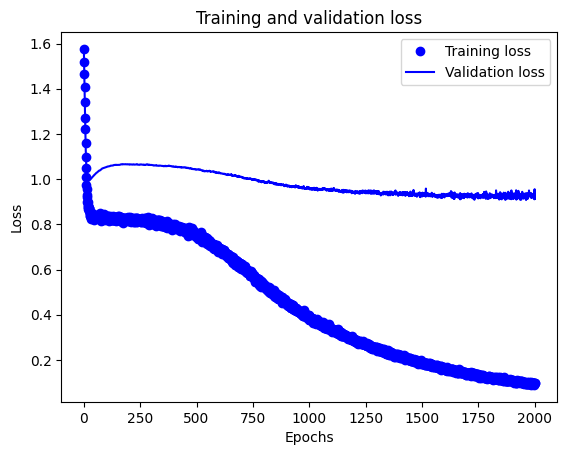

In [367]:
acc = history_dict['accuracy']
val_acc = history_dict['accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

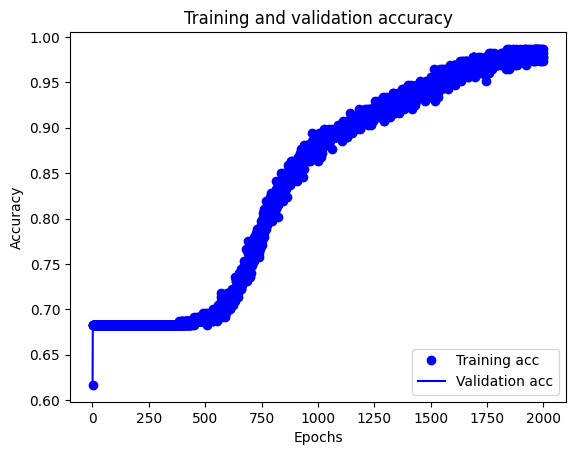

In [368]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [369]:
export_model = tf.keras.Sequential([
  merged_vectorize_layer,
  model,
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

examples = [
  "هیکل میا خیلی قشنگه", #"positive, null, null"
  "Love you guys❤️❤️", #"positive, null, null"
  "کروش کلی خطا کردی😂 رانینگ کردی توپ رو هی گرفتی دوباره دیریب میزدی😂👌" #"positive, opinion, the_media",
]

export_model.predict(examples)


1/1 [==============================] - 0s 74ms/step


array([[0.12655264, 0.3897952 , 0.20804556, 0.99350846, 0.09876224],
       [0.0905105 , 0.17786187, 0.20730509, 0.99932927, 0.09184401],
       [0.01805876, 0.02798968, 0.19755194, 0.99999785, 0.0758948 ]],
      dtype=float32)

In [370]:
model.save('./models/model7/model.h5')
model.save('./models/model7/model.keras')
# tensorflowjs_converter --input_format=keras ./ai/models/model5/sentiment/model.h5 ./ai/models/model5/sentiment/

# Define the command as a list of arguments
command = [
    'tensorflowjs_converter',
    '--input_format=keras',
    './models/model7/model.h5',
    './models/model7/',
]

# Run the command
try:
    subprocess.run(command, check=True, shell=False)
    print("Model conversion completed successfully.")
except subprocess.CalledProcessError as e:
    print("Model conversion failed. Error:", e)

/home/alireza/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2023-09-26 07:52:13.532406: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model conversion completed successfully.


In [371]:
# sentiment_model.save('./models/model5/sentiment/model.h5')
# sentiment_model.save('./models/model5/sentiment/model.keras')
# # tensorflowjs_converter --input_format=keras ./ai/models/model5/sentiment/model.h5 ./ai/models/model5/sentiment/

# # Define the command as a list of arguments
# command = [
#     'tensorflowjs_converter',
#     '--input_format=keras',
#     './models/model5/sentiment/model.h5',
#     './models/model5/sentiment/',
# ]

# # Run the command
# try:
#     subprocess.run(command, check=True, shell=False)
#     print("Model conversion completed successfully.")
# except subprocess.CalledProcessError as e:
#     print("Model conversion failed. Error:", e)

In [372]:
# type_model.save('./models/model5/type/model.h5')
# type_model.save('./models/model5/type/model.keras')
# # tensorflowjs_converter --input_format=keras ./ai/models/model5/sentiment/model.h5 ./ai/models/model5/sentiment/

# # Define the command as a list of arguments
# command = [
#     'tensorflowjs_converter',
#     '--input_format=keras',
#     './models/model5/type/model.h5',
#     './models/model5/type/',
# ]

# # Run the command
# try:
#     subprocess.run(command, check=True, shell=False)
#     print("Model conversion completed successfully.")
# except subprocess.CalledProcessError as e:
#     print("Model conversion failed. Error:", e)

In [373]:
# topic_model.save('./models/model5/topic/model.h5')
# topic_model.save('./models/model5/topic/model.keras')
# # tensorflowjs_converter --input_format=keras ./ai/models/model5/sentiment/model.h5 ./ai/models/model5/sentiment/

# # Define the command as a list of arguments
# command = [
#     'tensorflowjs_converter',
#     '--input_format=keras',
#     './models/model5/topic/model.h5',
#     './models/model5/topic/',
# ]

# # Run the command
# try:
#     subprocess.run(command, check=True, shell=False)
#     print("Model conversion completed successfully.")
# except subprocess.CalledProcessError as e:
#     print("Model conversion failed. Error:", e)